<a href="https://colab.research.google.com/github/shadab4150/practice_projects/blob/master/Covid_19_india_15may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip '/content/covid19-corona-virus-india-dataset (2).zip'

Archive:  /content/covid19-corona-virus-india-dataset (2).zip
  inflating: api.ipynb               
  inflating: complete.csv            
  inflating: district_level_latest.csv  
  inflating: nation_level_daily.csv  
  inflating: patients_data.csv       
  inflating: state_level_latest.csv  
  inflating: tests_daily.csv         
  inflating: tests_latest_state_level.csv  
  inflating: web_scraping.ipynb      
  inflating: zones.csv               


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv('complete.csv')
pat = pd.read_csv('/content/patients_data.csv')
dis = pd.read_csv('/content/district_level_latest.csv')
state = pd.read_csv('/content/state_level_latest.csv')
nat = pd.read_csv('/content/nation_level_daily.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,10,11,13,20) have mixed types.Specify dtype option on import or set low_memory=False.



In [9]:
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [0]:
sta = df.groupby(by=['Name of State / UT'])

In [0]:
delhi = sta.get_group('Delhi')

In [60]:
delhi.dtypes

Date                                           object
Name of State / UT                             object
Total Confirmed cases (Indian National)         int64
Total Confirmed cases ( Foreign National )      int64
Cured/Discharged/Migrated                       int64
Latitude                                      float64
Longitude                                     float64
Death                                           int64
Total Confirmed cases                           int64
chanege                                       float64
dtype: object

In [0]:
delhi['chanege'] = delhi['Total Confirmed cases'].pct_change()*100

In [0]:
cases = delhi['Total Confirmed cases'].values;cases

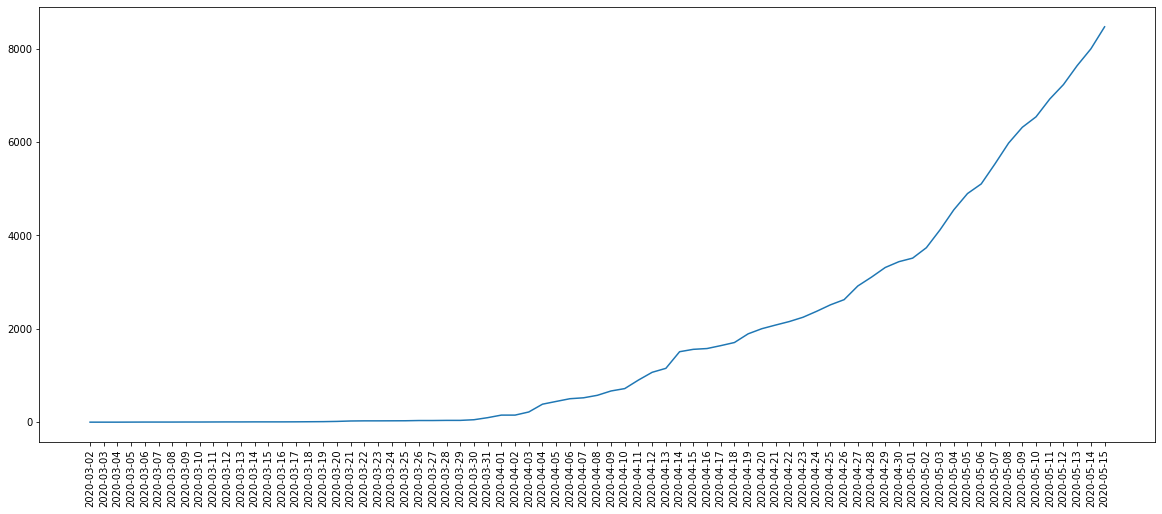

In [70]:
plt.figure(1,figsize=(20,8))
plt.plot(cases)
plt.xticks(np.arange(75),delhi.Date.values.tolist(),rotation=90);

In [0]:
grow = []
val = [0]+cases
for i in range(len(val)-1):
  a = abs(val[i+1]-val[i])
  grow.append(a)


### For delhi

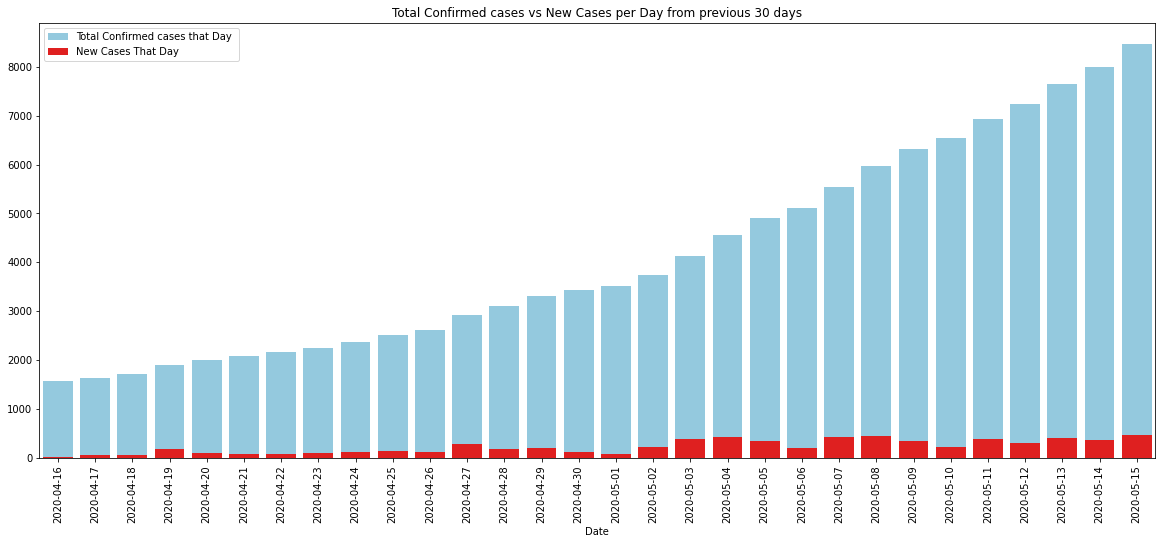

In [80]:
plt.figure(1,figsize=(20,8))
sns.barplot(x=delhi.Date[-30:],y=cases[-30:],color='skyblue',label='Total Confirmed cases that Day ');
sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title("Total Confirmed cases vs New Cases per Day from previous 30 days")
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()

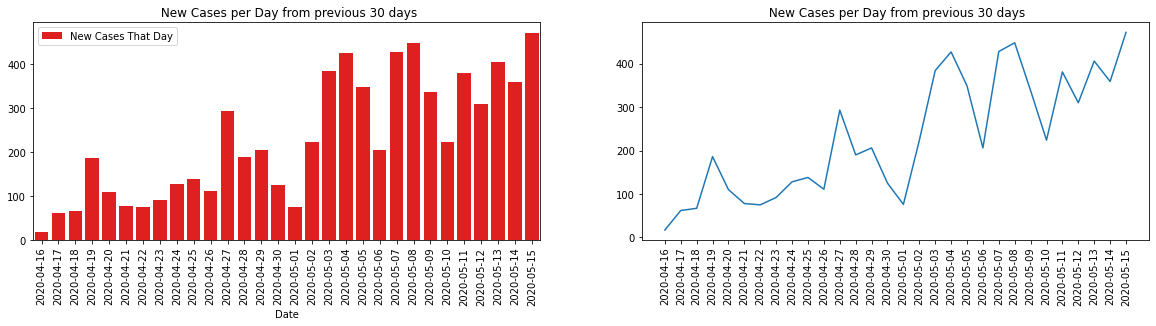

In [89]:
plt.figure(1,figsize=(20,4))
plt.subplot(121)
sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title(" New Cases per Day from previous 30 days")
#plt.plot(grow[-30:])
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()
plt.subplot(122)
#sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title(" New Cases per Day from previous 30 days")
plt.plot(grow[-30:])
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);

In [170]:
delhi.Date.values

array(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

In [90]:
cases

array([   1,    1,    1,    2,    3,    3,    3,    4,    4,    5,    6,
          6,    7,    7,    7,    8,   10,   12,   17,   26,   29,   29,
         30,   31,   36,   36,   39,   39,   53,   97,  152,  152,  219,
        386,  445,  503,  523,  576,  669,  720,  903, 1069, 1154, 1510,
       1561, 1578, 1640, 1707, 1893, 2003, 2081, 2156, 2248, 2376, 2514,
       2625, 2918, 3108, 3314, 3439, 3515, 3738, 4122, 4549, 4898, 5104,
       5532, 5980, 6318, 6542, 6923, 7233, 7639, 7998, 8470])

# Lets fits number of cases to  logistic curve

* A logistic function or logistic curve is a common S-shaped curve (sigmoid curve) with equation

![kd](https://wikimedia.org/api/rest_v1/media/math/render/svg/9e26947596d387d045be3baeb72c11270a065665)

> where

* e = the natural logarithm base (also known as Euler's number),
* x0 = the x value of the sigmoid's midpoint,
* L = the curve's maximum value,
* k = the logistic growth rate or steepness of the curve.[1]


<center><img src ='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png'></center>

In [0]:
from scipy.optimize import curve_fit 

In [99]:
x = np.arange(1,76)
y = cases;len(cases)

75

In [0]:
def test(x,a,b,c):
  return a/(1+b*np.exp(c*(-x)))

In [0]:
par, par_cov = curve_fit(test, x, cases)

In [105]:
par,par_cov

(array([1.82230837e+04, 6.21157179e+02, 8.36068795e-02]),
 array([[ 3.83238494e+06, -2.94431093e+04, -5.41187587e+00],
        [-2.94431093e+04,  2.38190126e+03,  9.38406577e-02],
        [-5.41187587e+00,  9.38406577e-02,  8.92973298e-06]]))

In [0]:
x2 = np.arange(100)

In [0]:
ans = par[0]/(1+par[1]*np.exp(par[2]*(-x)))
ans2 = par[0]/(1+par[1]*np.exp(par[2]*(-x2))) # 

### Projecting next 25 days for delhi

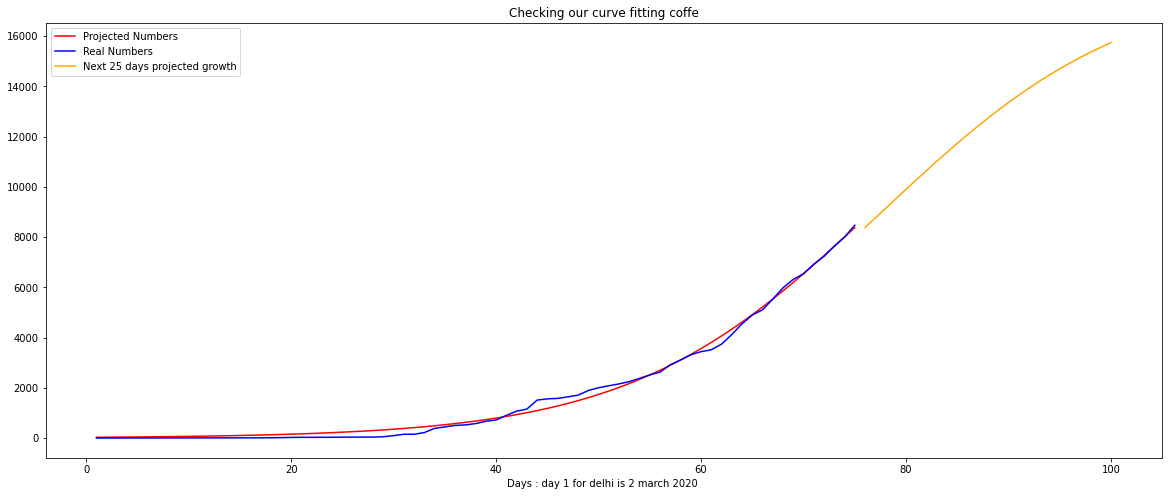

In [171]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=x,y=ans,color='red',label='Projected Numbers')
sns.lineplot(x=x,y=cases,color='blue',label='Real Numbers')
sns.lineplot(x=np.arange(1,101)[-25:],y=ans2[-25:],color='orange',label='Next 25 days projected growth')
plt.title('Checking our curve fitting coffe')
plt.xlabel('Days : day 1 for delhi is 2 march 2020 ')
plt.legend()

In [132]:
px.line(x=np.arange(1,101)[-25:],y=ans2[-25:])

In [135]:
ans2[-25:]

array([ 8379.33435447,  8758.82221009,  9139.53956353,  9520.15917827,
        9899.35517902, 10275.82145834, 10648.28950292, 11015.54512829,
       11376.44366465, 11729.92321136, 12075.01566733, 12410.85534432,
       12736.68507147, 13051.85979795, 13355.84778995, 13648.22959433,
       13928.69500188, 14197.03828604, 14453.15201898, 14697.01977653,
       14928.70803886, 15148.35757755, 15356.17459408, 15552.42184362,
       15737.40994239])

In [137]:
cases[-5:]

array([6923, 7233, 7639, 7998, 8470])

In [0]:
nattot= nat.totalconfirmed.tolist()

In [0]:
n1 = np.arange(1,107)

In [0]:
p,p_coc=curve_fit(test,n1,nattot)   # Fitting the national data

In [0]:
ansN = p[0]/(1+p[1]*np.exp(p[2]*(-n1)))

In [0]:
n2 = np.arange(107,130)
ansN2 = p[0]/(1+p[1]*np.exp(p[2]*(-n2)))

### Projecting next 30 days for india

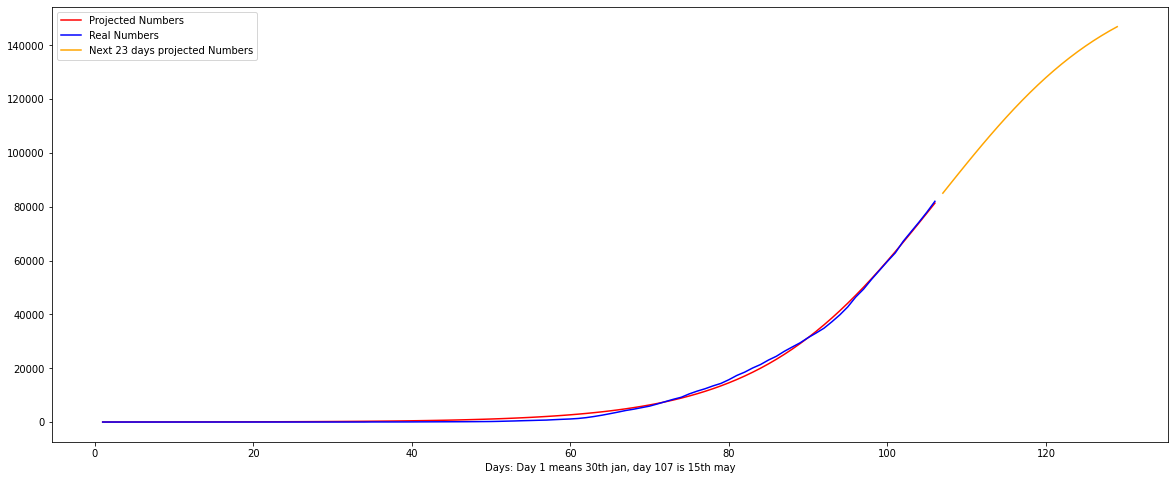

In [169]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=n1,y=ansN,color='red',label='Projected Numbers')
sns.lineplot(x=n1,y=nattot,color='blue',label='Real Numbers');
sns.lineplot(x=n2,y=ansN2,color='orange',label='Next 23 days projected Numbers');
plt.xlabel('Days: Day 1 means 30th jan, day 107 is 15th may');

In [158]:
ansN2

array([ 85064.42402191,  88750.29851616,  92416.4335795 ,  96048.86613137,
        99634.14747902, 103159.53660352, 106613.1712424 , 109984.21225241,
       113262.95809177, 116440.92769688, 119510.91144371, 122466.99119023,
       125304.53152049, 128020.14520636, 130611.6365419 , 133077.92658652,
       135418.96449192, 137635.6290139 , 139729.62406467, 141703.37178578,
       143559.90616201, 145302.76969118, 146935.91510913])

In [0]:
n3 = np.arange(1,138)
ansN3 = p[0]/(1+p[1]*np.exp(p[2]*(-n3)))

In [164]:
px.line(x=n3,y=ansN3)